In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor # model zawierający szereg warunków
from sklearn.metrics import mean_absolute_error # w jaki sposób mierzymy sukces
from sklearn.model_selection import cross_val_score


In [0]:
cd '/content/drive/My Drive/Colab Notebooks/Matrix/DataWorkshopMatrix'

/content/drive/My Drive/Colab Notebooks/Matrix/DataWorkshopMatrix


In [0]:
ls data

men_shoes.csv


In [0]:
df = pd.read_csv('data/men_shoes2.csv',low_memory=False)

In [0]:
df.shape

(18524, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

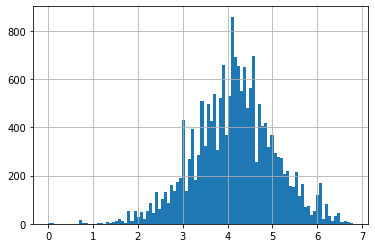

In [0]:
 np.log1p(df['prices_amountmin']).hist(bins=100) # generowanie wykresu symetrycznego (nie z ogonem)

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
y_true = df['prices_amountmin']
price_log_mean =  np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
#df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight,brand_cat,manufacturer_cat,prices_issale_cat,sizes_cat
5536,AVpfHKIM1cnluZ0-eKJi,NaN,Scully,"All Men's Clothing,Men's Clothing,Men's Outerw...",NaN,NaN,2016-01-02T03:17:55Z,2016-03-30T20:39:56Z,NaN,5 in x 10 in x 10 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/1363/prod_3191...,NaN,"scully/20611s,scully20611smenleatherlapelvestb...",NaN,206-11-S,NaN,Scully 206-11-s Men Leather Lapel Vest - Black...,154.01,154.01,NaN,NaN,NaN,NaN,USD,2016-01-02T03:17:55Z,2016-02-15T00:00:00Z,NaN,False,"UnbeatableSale.com, Inc.",NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,400,-1,1,-1
6005,AVpe7HaFLJeJML43yZ9x,B00SM1YSL6,Casio,"Watches,Clothing, Shoes & Jewelry,Men,Wrist Wa...",NaN,NaN,2015-11-09T17:06:19Z,2016-07-27T22:01:01Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"casio/prw3500y4jf,casioprotrekmultifieldlinemu...",NaN,PRW-3500Y-4JF,NaN,Casio Protrek Multi Field Line Munliband 6 Sol...,267.40,267.40,NaN,NaN,NaN,NaN,USD,2015-11-09T17:06:19Z,2015-09-09T00:00:00Z,NaN,False,NaN,NaN,NaN,FREE Shipping,NaN,NaN,http://www.amazon.com/CASIO-PROTREK-MULTI-Munl...,NaN,NaN,NaN,NaN,NaN,http://www.amazon.com/CASIO-PROTREK-MULTI-Munl...,NaN,NaN,NaN,NaN,777,-1,1,-1
17678,AVpfkrVNilAPnD_xePaF,NaN,Superior Glove Works,"Men's Work Gloves,Power Tools,Safety Apparel,W...",NaN,NaN,2016-01-02T03:04:34Z,2016-04-06T01:10:05Z,NaN,5.3 in x 13.7 in x 4.4 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/21875/prod_489...,NaN,"superiorgloveworks/ne30309,superiorgloveworkss...",NaN,NE30309,NaN,Superior Glove Works Superior Ne3030 Chemstop ...,67.84,67.84,NaN,NaN,NaN,NaN,USD,2016-01-02T03:04:34Z,2016-03-31T00:00:00Z,NaN,False,Factory Advantage LLC,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,87,-1,1,-1
12487,AVpfmHoqLJeJML43AIRg,NaN,Nike,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-11-07T00:00:06Z,2016-11-07T00:00:06Z,"[{""dateSeen"":[""2016-11-07T00:00:06Z""],""sourceU...",NaN,6.596589e+11,"[{""key"":""Sport"",""value"":[""Training Shoes""]},{""...",NaN,https://i5.walmartimages.com/asr/0ee4ffd6-a45f...,NaN,"nike/553684302,659658905252,0659658905252",Nike,553684 302,"[{""dateSeen"":[""2016-11-07T00:00:06Z""],""name"":""...",Nike Free Trainer 3.0 Traning Shoes,113.85,113.85,NaN,NaN,new,NaN,USD,2016-11-07T00:00:06Z,2016-11-05T00:00:00Z,NaN,False,shoezoo - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/NIKE-FREE-TRAINER-3...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/NIKE-FREE-TRAINER-3...,6.596589e+11,NaN,NaN,NaN,20,14,1,-1
10760,AVpfu3ZFLJeJML43CusZ,B00N7S7SZC,willtopinc,"Bow Ties,Accessories,Men,Bow Ties & Cummerbund...",NaN,NaN,2016-05-12T03:47:13Z,2016-08-03T18:01:08Z,NaN,NaN,NaN,NaN,NaN,http://ecx.images-amazon.com/images/I/51p87vKI...,NaN,willtopinctartanplaidstyleswovenmicrofiberpret...,NaN,HM-QM24,NaN,Willtopinc Tartan Plaid Styles Woven Microfibe...,19.99,19.99,NaN,NaN,NaN,NaN,USD,2016-05-12T03:47:13Z,2016-02-19T00:00:00Z,NaN,False,WILLTOPINC,NaN,NaN,FREE Shipping on eligible orders. FREE Returns.,NaN,NaN,http://www.amazon.com/Willtopinc-Tartan-Styles...,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com/Willtopinc-Tartan-Style...,NaN,NaN,NaN,NaN,1356,-1,1,-1


In [0]:
#df.brand.value_counts()

Nike              1709
PUMA               574
Ralph Lauren       524
New Balance        361
VANS               356
                  ... 
Ubisoft              1
Whose Lemon          1
Oliver Sweeney       1
Polo                 1
TAILIAN              1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
#sklearn.metrics.SCORERS.keys()

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values
  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
run_model(['brand_cat','manufacturer_cat'])

(-58.53930419908595, 4.31122323161543)